In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import seaborn as sns

In [2]:

trees = pd.read_csv('../data/reforestree/field_data.csv')

In [3]:
site = "Leonor Aspiazu RGB"
trees_site = trees[trees.site == site]
trees_site

,name,lat,lon,diameter,height,year,plot_id,site,X,Y,updated diameter,group,AGB,carbon
872,Cacao,-1.150942,-79.579644,0.000000,0.0,2018.0,P2,Leonor Aspiazu RGB,7330.262870,9960.864442,5.411255,cacao,3.419771,1.333711
873,Cacao,-1.150985,-79.579707,0.000000,0.0,2018.0,P2,Leonor Aspiazu RGB,6652.934690,10409.607829,5.411255,cacao,3.419771,1.333711
874,Cacao,-1.150892,-79.579782,0.000000,0.0,2018.0,P2,Leonor Aspiazu RGB,5841.376913,9423.408589,5.411255,cacao,3.419771,1.333711
875,Cacao,-1.150797,-79.579825,0.000000,0.0,2018.0,P2,Leonor Aspiazu RGB,5374.609214,8426.952961,5.411255,cacao,3.419771,1.333711
876,Cacao,-1.150677,-79.579890,0.000000,0.0,2018.0,P2,Leonor Aspiazu RGB,4663.994696,7155.795325,5.411255,cacao,3.419771,1.333711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656,Cacao,-1.150493,-79.579299,0.000000,0.0,2018.0,P2,Leonor Aspiazu RGB,11069.717266,5206.447281,5.411255,cacao,3.419771,1.333711
1657,Cacao,-1.150461,-79.579294,0.000000,0.0,2018.0,P2,Leonor Aspiazu RGB,11131.085563,4868.620909,5.411255,cacao,3.419771,1.333711
1658,Musacea,-1.150301,-79.579341,21.645022,0.0,2018.0,P2,Leonor Aspiazu RGB,10614.876268,3176.634177,21.645022,banana,20.962055,8.175201
1659,Musacea,-1.150775,-79.579169,18.621085,0.0,2018.0,P2,Leonor Aspiazu RGB,12481.404941,8185.980722,18.621085,banana,15.213595,5.933302


In [4]:
trees_site.groupby(by="name").mean()

/var/folders/nz/fyqhwzv1271gch4y19rxtnwc0000gn/T/ipykernel_2148/3019073049.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trees_site.groupby(by="name").mean()


,lat,lon,diameter,height,year,X,Y,updated diameter,AGB,carbon
name,,,,,,,,,,
Achotillo,-1.150806,-79.579709,0.000000,0.0,2018.0,6632.225600,8518.626033,5.411255,6.697409,2.611989
Balsa,-1.150996,-79.579667,0.000000,0.0,2018.0,7079.260031,10524.754283,5.411255,5.360222,2.090487
Bariable,-1.150933,-79.579819,0.000000,0.0,2018.0,5433.592171,9860.098078,9.708429,22.931482,8.943278
Cacao,-1.150684,-79.579528,0.395931,9.3,2018.0,8595.605459,7226.685703,5.154573,3.172222,1.237166
Caoba,-1.150646,-79.579355,2.664702,0.0,2018.0,10464.243586,6822.213496,4.983812,5.208686,2.031387
Cedro,-1.150579,-79.579336,1.782531,0.0,2018.0,10675.507277,6118.673649,6.111536,7.916030,3.087252
Guaba,-1.150718,-79.579579,2.812047,0.0,2018.0,8043.513561,7591.017135,4.669643,7.723946,3.012339
Guachapeli,-1.150658,-79.579439,4.615483,0.0,2018.0,9554.158869,6957.989789,5.968296,7.149200,2.788188
Guanabana,-1.150772,-79.579698,2.745416,0.0,2018.0,6751.140228,8160.974169,4.098230,3.528504,1.376117


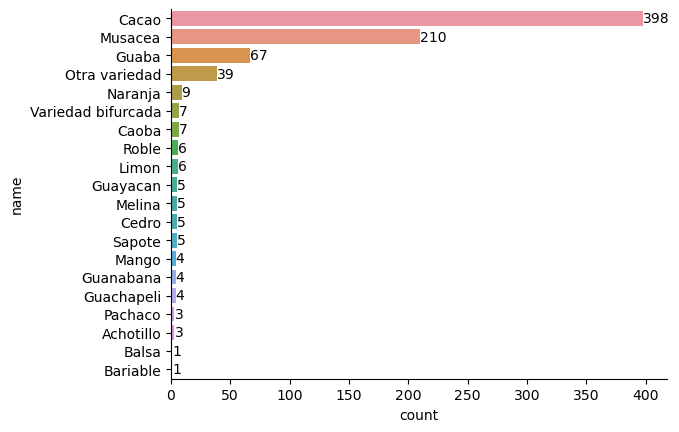

In [12]:
group_data = trees_site.groupby(by="name").count().sort_values(by="AGB", ascending=False)
ax = sns.barplot(x=group_data.AGB, y=group_data.index)
ax.bar_label(ax.containers[0])
plt.xlabel("count")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

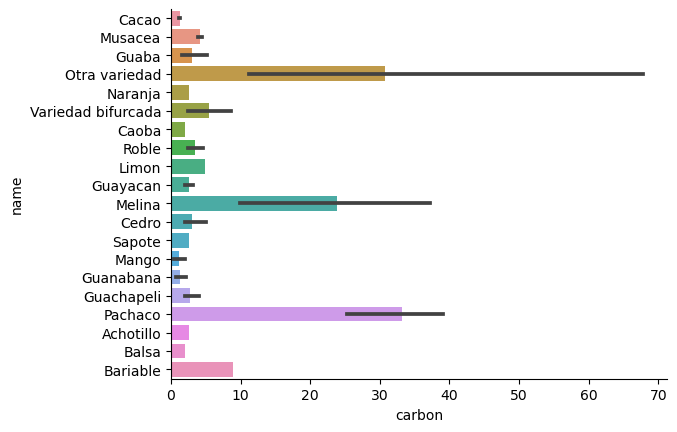

In [13]:
ax = sns.barplot(data=trees_site, x="carbon", y="name", order=group_data.index)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [14]:
annotated_data = pd.read_csv('../data/annotations/Leonor Aspiazu RGB/labels_ai4est.csv')

In [15]:
annotated_data['x_min'] = [int(image_name.split("_")[2]) for image_name in annotated_data.image_name]
annotated_data['y_min'] = [int(image_name.split("_")[3]) for image_name in annotated_data.image_name]

In [16]:
annotated_data['bbox_X'] = annotated_data['x_min'] + annotated_data['bbox_x']
annotated_data['bbox_Y'] = annotated_data['y_min'] + annotated_data['bbox_y']
annotated_data['X'] = annotated_data['bbox_width']/2 + annotated_data['bbox_X']
annotated_data['Y'] = annotated_data['bbox_height']/2 + annotated_data['bbox_Y']

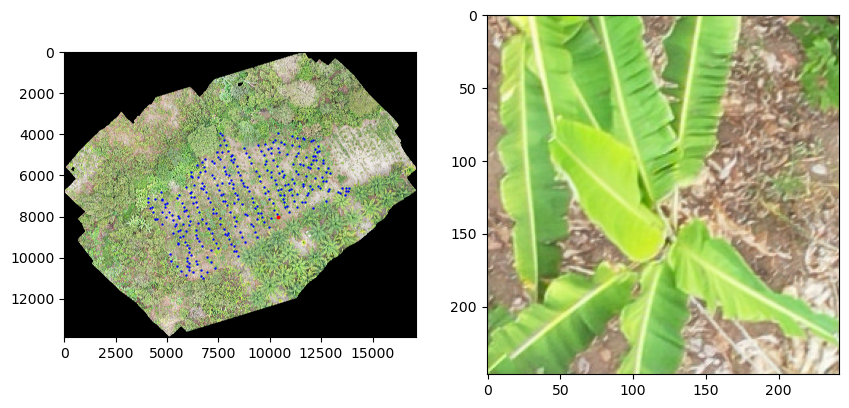

In [17]:
path = '../data/reforestree/wwf_ecuador/RGB Orthomosaics/{}.tif'.format(site)
img = cv2.imread(path)
img = np.array(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

tree = annotated_data.iloc[0]

fig, axs = plt.subplots(1, 2, figsize=(10,15))
axs = axs.flat

axs[0].imshow(img)
axs[0].scatter(annotated_data.X, annotated_data.Y, s=0.5, c='b')
axs[0].scatter(tree.X, tree.Y, s=3, c='r')

axs[1].imshow(img[int(tree.Y-tree.bbox_height/2):int(tree.Y+tree.bbox_height/2), int(tree.X-tree.bbox_width/2):int(tree.X+tree.bbox_width/2)])
plt.show()

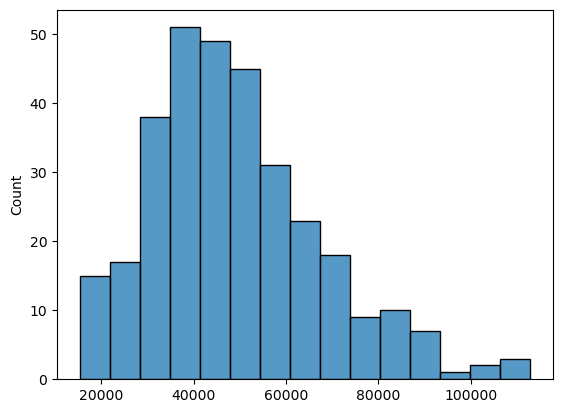

(210, 14)


In [18]:
sns.histplot(annotated_data.bbox_width * annotated_data.bbox_height)
plt.show()

print(annotated_data[annotated_data.bbox_width * annotated_data.bbox_height > 39650].shape)

In [20]:
from sklearn.cluster import KMeans
features = ["X", "Y"]
X = annotated_data[features]

n_clusters = 210
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
yhat = kmeans.predict(X)
clusters_identified = pd.DataFrame(kmeans.cluster_centers_, columns=features)

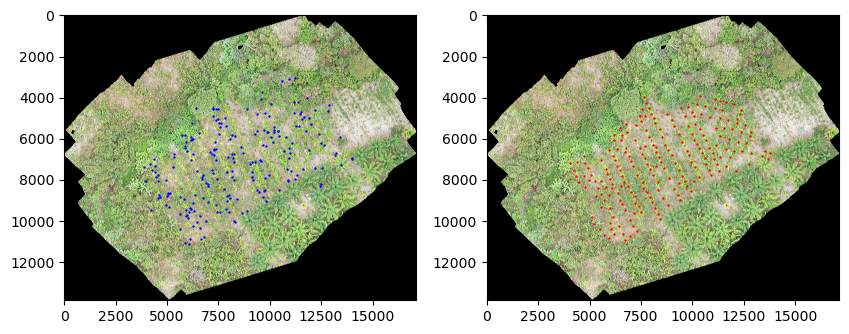

In [248]:
trees_site_musacea = trees_site[trees_site.name == "Musacea"]
annotated_data_filtered = clusters_identified
annotated_data_filtered.X = np.rint(annotated_data_filtered.X)
annotated_data_filtered.Y = np.rint(annotated_data_filtered.Y)
# annotated_data_filtered = annotated_data

fig, axs = plt.subplots(1, 2, figsize=(10,15))
axs = axs.flat

axs[0].imshow(img)
axs[0].scatter(trees_site_musacea.X, trees_site_musacea.Y, s=0.5, c='b')

axs[1].imshow(img)
axs[1].scatter(annotated_data_filtered.X, annotated_data_filtered.Y, s=0.5, c='r')
plt.show()

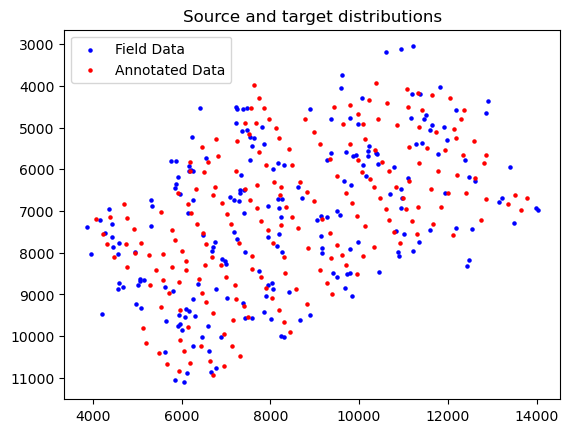

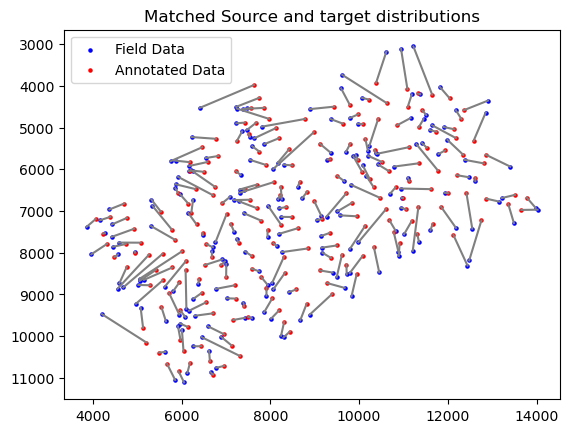

In [249]:
import ot
import ot.plot
xs = trees_site_musacea[["X", "Y"]].values
xt = annotated_data_filtered[["X", "Y"]].values
M = ot.dist(xs, xt, metric="euclidean")

a, b = np.ones((xs.shape[0],)) / xs.shape[0], np.ones((xt.shape[0],)) / xt.shape[0]  # uniform distribution on samples
G0 = ot.emd(a, b, M)

plt.figure()
plt.scatter(trees_site_musacea.X, trees_site_musacea.Y, s=5, c='b',label="Field Data")
plt.scatter(annotated_data_filtered.X, annotated_data_filtered.Y, s=5, c='r',label="Annotated Data")
plt.legend(loc=0)
plt.title('Source and target distributions')
plt.gca().invert_yaxis()
plt.show()
plt.figure()
ot.plot.plot2D_samples_mat(xs, xt, G0, c=[.5, .5, 0.5])
plt.scatter(trees_site_musacea.X, trees_site_musacea.Y, s=5, c='b',label="Field Data")
plt.scatter(annotated_data_filtered.X, annotated_data_filtered.Y, s=5, c='r',label="Annotated Data")
plt.legend(loc=0)
plt.gca().invert_yaxis()
plt.title('Matched Source and target distributions')
plt.show()

In [250]:
print("Weierstrass: {w:.2f}".format(w=ot.emd2(a, b, M)))

Weierstrass: 404.46


In [251]:
G0.shape

(210, 210)

In [252]:
distances = []
for i, xs_i in enumerate(xs):
    xt_i = xt[np.argmax(G0[i])]
    dis = np.abs(np.linalg.norm(xs_i - xt_i))
    distances.append(dis)

In [253]:
gsd = 1.06 / 100
print("Mean error: {px:.0f} px | {m:.2f} m".format(px=np.mean(distances), m=np.mean(distances)*gsd))
print("Standard Deviation: {px:.0f} px | {m:.2f} m".format(px=np.std(distances), m=np.std(distances)*gsd))

Mean error: 404 px | 4.29 m
Standard Deviation: 281 px | 2.98 m


/opt/homebrew/Caskroom/miniforge/base/envs/ai4good/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


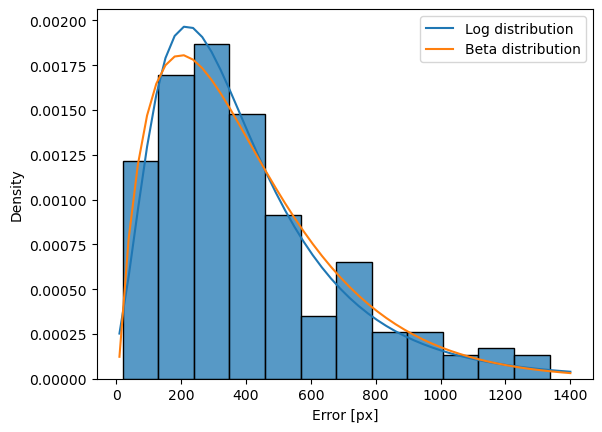

Log params:  (0.5647785370706171, -87.38146049034984, 420.98918285555493)
Beta params:  (1.8527806932131168, 37.32598614667407, 6.8954880254918605, 8403.533948627253)


In [254]:
from scipy.stats import lognorm
from scipy.stats import beta
from scipy.stats import norm

x = np.linspace(10, 1400)
sns.histplot(distances, stat="density")

param_log = lognorm.fit(distances, loc=0, scale=500)
log_dis = lognorm.pdf(x, param_log[0], loc=param_log[1], scale=param_log[2])
plt.plot(x, log_dis, label="Log distribution")

param_beta = beta.fit(distances, loc=0, scale=500)
beta_dis = beta.pdf(x, param_beta[0], param_beta[1], loc=param_beta[2], scale=param_beta[3])
plt.plot(x, beta_dis, label="Beta distribution")

plt.legend()
plt.xlabel("Error [px]")
plt.show()

print("Log params: ", param_log)
print("Beta params: ", param_beta)

In [255]:
errors = []
for i, xs_i in enumerate(xs):
    xt_i = xt[np.argmax(G0[i])]
    error = xs_i - xt_i
    errors.append(error)
errors = np.array(errors)

In [256]:
mean = np.mean(errors, axis=0)
cov = np.cov(errors, rowvar=0)
print("Mean: ", mean)
print("Covariance: ", cov)

Mean:  [-182.95193671   66.92059526]
Covariance:  [[ 92218.09039809   -638.37862569]
 [  -638.37862569 113588.76442672]]


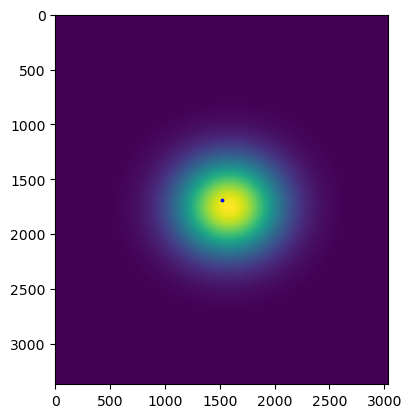

In [257]:
from scipy.stats import multivariate_normal
sigma_multiple = 10

mean = np.mean(errors, axis=0)
cov = np.cov(errors, rowvar=0)

max_x_tree = int(sigma_multiple * np.sqrt(cov[0,0]))
max_y_tree = int(sigma_multiple * np.sqrt(cov[1,1]))
y_range, x_range = np.mgrid[0:max_y_tree, 0:max_x_tree]
pos = np.dstack((y_range, x_range))
rv = multivariate_normal([max_y_tree/2 + mean[1], max_x_tree/2 + + mean[1]], np.cov(errors, rowvar=0))
gaussian = rv.pdf(pos)

plt.imshow(gaussian)
plt.scatter(gaussian.shape[1]/2, gaussian.shape[0]/2, s=3, c='b')
plt.show()